## EXERCICE 5 : Analyse ANOVA

inspire de  https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/


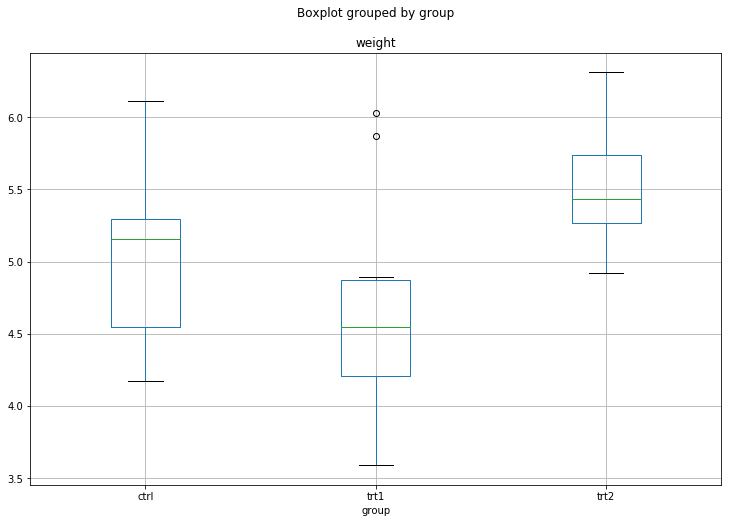

In [2]:

#1) INIT

#1.1) Importe les modules matplotlib (pour la visualisation de graphes) et pandas (pour la manipulation de donnees)
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

#1.2) charge les donnees
data = pd.read_csv("PlantGrowth.csv")
 
#1.3) represente un resume des données (necessite d'avoir appele matplotlib)
data.boxplot('weight', by='group', figsize=(12, 8))
plt.show()


##### QUESTION 1 : 
- Que signifient les box-plots (ou boite a moustache) ? Vous pouvez taper 'data.boxplot?' pour des informations elementaires
- Les groupes vous semblent-il distribues de maniere similaire ?
- Les variabilités intra-groupe vous semblent-t-elles similaires ?


##### Réponses

- Elle represente le 1 et 3 quartile, plus la mediane d'un jeu de donnees.Elles representent de meme les valeurs limites au dela desquelles des observations peuvent etre considerees comme abérantes
- Non
- Oui

In [3]:
#2) STATISTIQUE DE FISHER

 
grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}
 
k = len(grps)  # nombre de groupes
N = len(data.values)  # nombre d'observations
n = data.groupby('group').size()[0] #nombre d'observations dans chaque groupe (on remarque que tous les groupes on la meme taille)

#calcule la variabilite due aux interactions entre groupes (Sum of Squares Between)
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n)- (data['weight'].sum()**2)/N

#calcule la variabilite due aux differences entre les observations (Sum of Squares Within)
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

#calcule la variabilite totale (Sum of Squares Total)
SStotal = sum_y_squared - (data['weight'].sum()**2)/N

#defini les degres de liberte
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#calcule la statistique de Fisher
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin


p = stats.f.sf(F, DFbetween, DFwithin)

print(p)

0.015909958325623124


##### QUESTION 2
Faire le lien avec la section 4.3 du cours pour comprendre ce que signifie p.


Réponse : En tapant stats.f.sf?, on peut voir que p est la survival function, c'est a dire (1-cdf) ou la cdf est la 'cumulative distribution function'. Vu que la valeur est inferieure a 0.05, on rejette l'hypothese nulle, bref on conclue qu'il y a une inegalite des moyennes.



##### QUESTION 3
Adapter ce code pour etudier la colonne 'f2' des donnees IRIS de 'DataIris.csv'.


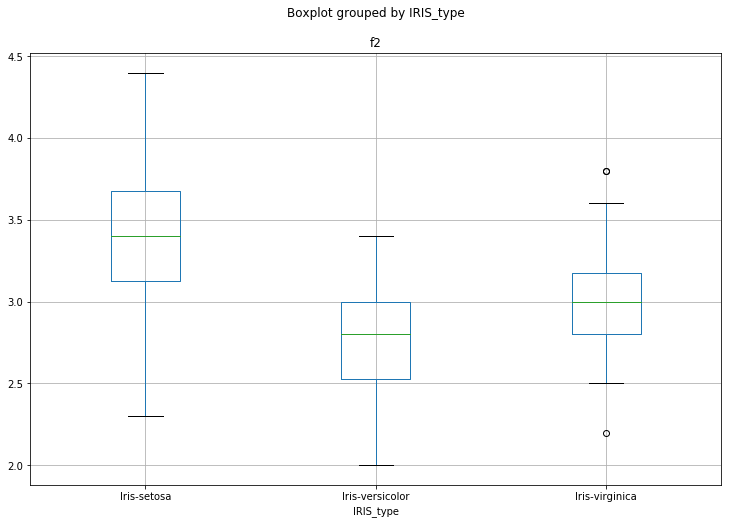

1.3279165184537495e-16


In [6]:

data = pd.read_csv("DataIris.csv")
 
data.boxplot('f2', by='IRIS_type', figsize=(12, 8))
plt.show()


 
grps = pd.unique(data.IRIS_type.values)
d_data = {grp:data['f2'][data.IRIS_type == grp] for grp in grps}
 
k = len(grps)  
N = len(data.values)  
n = data.groupby('IRIS_type').size()[0] 

#calcule la variabilite due aux interactions entre groupes (Sum of Squares Between)
SSbetween = (sum(data.groupby('IRIS_type').sum()['f2']**2)/n)- (data['f2'].sum()**2)/N

#calcule la variabilite due aux differences entre les observations (Sum of Squares Within)
sum_y_squared = sum([value**2 for value in data['f2'].values])
SSwithin = sum_y_squared - sum(data.groupby('IRIS_type').sum()['f2']**2)/n

#calcule la variabilite totale (Sum of Squares Total)
SStotal = sum_y_squared - (data['f2'].sum()**2)/N

#defini les degres de liberte
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#calcule la statistique de Fisher
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin


p = stats.f.sf(F, DFbetween, DFwithin)

print(p)


##### QUESTION 4 :

Est-ce qu'un test non-parametrique de kruskal wallis mene aux mêmes conclusions ?

Utiliser la fonction scipy.stats.kruskal


In [7]:

from scipy.stats import kruskal

f2vals=data['f2'].values

kres=kruskal(f2vals[0:50],f2vals[50:100],f2vals[100:150])

p=kres.pvalue

print(p)

2.6882119006774528e-14
